## Checking the overlapping quality of LOD 3 to 1

In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_image_grey(image_path):
    """
    Loads an image in grayscale mode.
    
    :param image_path: Path to the image file
    
    :return: Grayscale image as a numpy array
    """
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    return np.array(image, dtype=np.uint8)  # Convert to numpy array with uint8 type

    
def to_selected_line_color(image, channel):
    """
    Converts a grayscale image into a colored grayscale image using the specified channel.
    
    :param image: Grayscale image (2D numpy array)
    :param channel: One of 'r', 'g', or 'b' to indicate which color channel to use
    
    :return: RGB image where the selected channel holds the grayscale values
    """
    channel_map = {'r': 0, 'g': 1, 'b': 2}
    if channel not in channel_map:
        raise ValueError("Channel must be one of 'r', 'g', or 'b'")
    
    # Invert the grayscale: black lines become white
    image = 255 - image
    
    # Create RGB image initialized to zero
    colored_image = np.zeros((*image.shape, 3), dtype=np.uint8)
    colored_image[..., channel_map[channel]] = image  # Assign grayscale to selected channel
    
    return colored_image


def overlapping_draw_plot(image_list, show=True):
    """
    Draws overlapping plots from a list of images.
    
    :param image_list: List of images to plot
    """

    plt.figure(figsize=(10, 10))
    
    for image in image_list:
        plt.imshow(image, alpha=0.8)  # Set alpha for overlapping effect
    
    plt.axis('off')  # Hide axes
    if show:
        plt.show()
    
    return plt
    
def save_plot(plt, output_dir, filename):
    """
    Saves the plot to a specified directory.
    
    :param plt: Matplotlib plot object
    :param output_dir: Directory to save the plot
    :param filename: Name of the file to save the plot as
    """
    
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    plt.savefig(os.path.join(output_dir, filename), bbox_inches='tight')
    plt.close()  # Close the plot to free memory
    
def show_lod_triplet(images, titles=['LOD 3', 'LOD 2', 'LOD 1'], figsize=(10, 10)):
    """
    Displays three LOD grayscale images side by side.

    :param images: List of 3 grayscale images [lod3, lod2, lod1] as numpy arrays
    :param titles: List of 3 titles for the images (default: ['LOD 3', 'LOD 2', 'LOD 1'])
    :param figsize: Tuple for figure size (default: (10, 10))
    """
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, 3, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.show()

KeyboardInterrupt: 

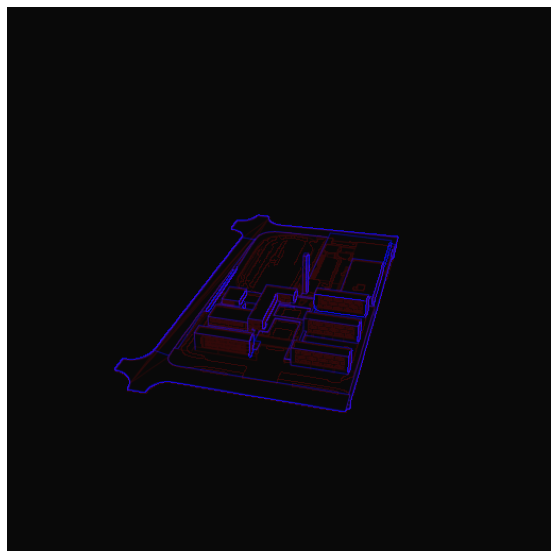

In [3]:
DATASET_PATH = '/home/athiwat/progressive_img2sketch/resources/LOD_combined_sketches_best_i_think'
OUTPUT_PATH = '/home/athiwat/progressive_img2sketch/resources/overlapping_plots'
# example image path /home/athiwat/progressive_img2sketch/resources/LOD_combined_sketches_best_i_think/3/lod3/lod3_az000_el15.png

    
#for each scene plot the image overlapping lod3, lod2, lod1 of the same azimuth and elevation

for scene in os.listdir(DATASET_PATH):
    scene_path = os.path.join(DATASET_PATH, scene)
    if os.path.isdir(scene_path):
        lod3_path = os.path.join(scene_path, 'lod3')
        lod2_path = os.path.join(scene_path, 'lod2')
        lod1_path = os.path.join(scene_path, 'lod1')
                
        for image_name in os.listdir(lod3_path):
            if image_name.endswith('.png'):
                az_el = '_'.join(image_name.split('_')[1:])  # e.g., "az240_el30.png"

                # Construct correct filenames for LOD2 and LOD1
                lod3_filename = f'lod3_{az_el}'
                lod2_filename = f'lod2_{az_el}'
                lod1_filename = f'lod1_{az_el}'

                lod3_path_img = os.path.join(lod3_path, lod3_filename)
                lod2_path_img = os.path.join(lod2_path, lod2_filename)
                lod1_path_img = os.path.join(lod1_path, lod1_filename)

                # Skip if any image doesn't exist
                if not (os.path.exists(lod2_path_img) and os.path.exists(lod1_path_img)):
                    print(f"[!] Missing image for scene {scene}: {lod2_filename} or {lod1_filename}")
                    continue

                # Load images
                lod3 = load_image_grey(lod3_path_img)
                lod2 = load_image_grey(lod2_path_img)
                lod1 = load_image_grey(lod1_path_img)

                # Optional: Visual inspection
                # show_lod_triplet([lod3, lod2, lod1])

                # Convert to selected line color (you currently use white for all — change if desired)
                lod3_colored = to_selected_line_color(lod3, "r")  # Red
                lod2_colored = to_selected_line_color(lod2, "g")  # Green
                lod1_colored = to_selected_line_color(lod1, "b")  # Blue

                # show_lod_triplet([lod3_colored, lod2_colored, lod1_colored], titles=['LOD 3 (Red)', 'LOD 2 (Green)', 'LOD 1 (Blue)'])
                
                
                # Plot & Save
                # plot = overlapping_draw_plot([lod3_colored, lod2_colored, lod1_colored])
                plot = overlapping_draw_plot([lod3_colored, lod1_colored], show=False)
                save_plot(plot, OUTPUT_PATH, f'{scene}_{az_el}')
                
